In [211]:
print("--- Homework -- \n")
'''      
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

Dataset
For this homework, we'll use the Car Fuel Efficiency dataset. Download it from here.

You can do it with wget:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

Preparing the dataset
Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'
EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?
'''

--- Homework -- 



"      \nNote: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.\n\nDataset\nFor this homework, we'll use the Car Fuel Efficiency dataset. Download it from here.\n\nYou can do it with wget:\n\nwget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv\nThe goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').\n\nPreparing the dataset\nUse only the following columns:\n\n'engine_displacement',\n'horsepower',\n'vehicle_weight',\n'model_year',\n'fuel_efficiency_mpg'\nEDA\nLook at the fuel_efficiency_mpg variable. Does it have a long tail?\n"

In [212]:
# -- Data loading and selection of specific columns --- 

In [213]:
import pandas as pd

In [214]:
car_fuel_efficiency_data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [215]:
!wget $car_fuel_efficiency_data

--2025-10-08 23:48:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.5’

car_fuel_efficiency 100%[===================>] 853.70K  2.48MB/s    in 0.3s    

2025-10-08 23:48:21 (2.48 MB/s) - ‘car_fuel_efficiency.csv.5’ saved [874188/874188]



In [216]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [217]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [218]:
selected_columns = ['engine_displacement', 'horsepower',
           'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

In [219]:
df_filtered = df[selected_columns].copy()

In [220]:
df_filtered

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [221]:
# -- Exploratory Data Analysis(EDA) for fuel_efficiency_mpg(long tail check).

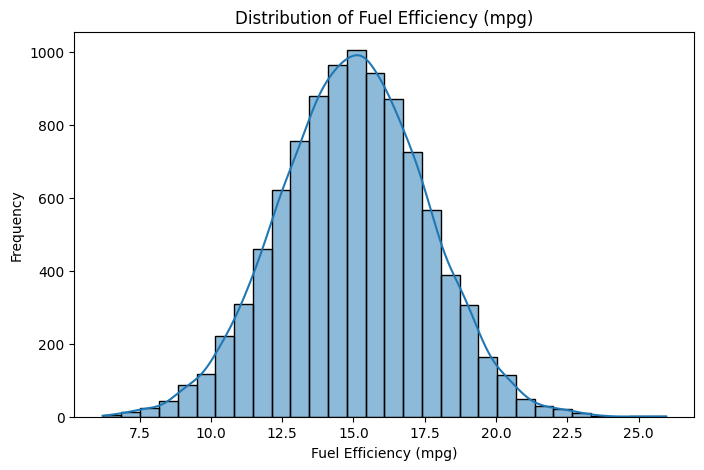

In [222]:
# Plot histogram of 'fuel_efficiency_mpg'

plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['fuel_efficiency_mpg'], bins=30, kde=True)
plt.title('Distribution of Fuel Efficiency (mpg)')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.show()


In [223]:

# Check skewness
skewness = df_filtered['fuel_efficiency_mpg'].skew()

print(f"Skewness of 'fuel_efficiency_mpg': {skewness:.2f}")

if skewness > 0.5:  # A common threshold for significant positive skewness
    print("The 'fuel_efficiency_mpg' variable appears to have a long tail (positively skewed).")
else:
    print("The 'fuel_efficiency_mpg' variable does not appear to have a significant long tail.")


Skewness of 'fuel_efficiency_mpg': -0.01
The 'fuel_efficiency_mpg' variable does not appear to have a significant long tail.


In [224]:
# --- Question 1 ---
'''
There's one column with missing values. What is it?

- 'engine_displacement'
- 'horsepower'
- 'vehicle_weight'
- 'model_year'

'''


--- Question 1: Column with missing values ---
Missing values per column:
 horsepower    708
dtype: int64


In [264]:
print("--- Question 1: Column with missing values ---")
missing_values = df_filtered.isnull().sum()

print("Missing values per column:\n", missing_values[missing_values > 0])

--- Question 1: Column with missing values ---
Missing values per column:
 horsepower    708
dtype: int64


In [225]:
# --- Question 2 ---
'''
What's the median (50% percentile) for variable 'horsepower'?

- 49
- 99
- 149
- 199
'''


--- Question 2: Median of 'horsepower' ---
The median (50% percentile) for 'horsepower' is: 149.0


In [265]:
print("--- Question 2: Median of 'horsepower' ---")
median_horsepower = df_filtered['horsepower'].median()

print(f"The median (50% percentile) for 'horsepower' is: {median_horsepower}")

--- Question 2: Median of 'horsepower' ---
The median (50% percentile) for 'horsepower' is: 149.0


In [266]:
## -- Shuffle the dataset (the filtered one you created above), use seed 42.
''' Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures
'''

print("--- Preparing and splitting the dataset ---")
np.random.seed(42)
n = len(df_filtered)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

n_val, n_test, n_train

--- Preparing and splitting the dataset ---


(1940, 1940, 5824)

In [227]:
idx = np.arange(n)
np.random.shuffle(idx)

In [228]:
df_shuffled = df_filtered.iloc[idx].reset_index(drop=True)

In [229]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [230]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

y_train, y_val, y_test

(array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
        18.92574819, 17.96528447]),
 array([15.36634109, 14.60118181, 12.24703219, ..., 13.61312692,
        13.73334321, 15.81604972]),
 array([15.80435416, 14.27237387, 11.74844072, ..., 18.40443466,
        20.50246014, 16.81624056]))

In [231]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [232]:
print(f"Train set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

Train set size: 5824
Validation set size: 1940
Test set size: 1940


In [233]:
# --- Linear Regression Functions ---

In [234]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y

    return w[0], w[1:]


In [235]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T @ X
    XTX = XTX + r * np.eye(XTX.shape[0])  # Add regularization term

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y

    return w[0], w[1:]


In [236]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [237]:
# --- Question 3 ---
'''
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

- With 0
- With mean
- Both are equally good
'''

'\nWe need to deal with missing values for the column from Q1.\nWe have two options: fill it with 0 or with the mean of this variable.\nTry both options. For each, train a linear regression model without regularization using the code from the lessons.\nFor computing the mean, use the training only!\nUse the validation dataset to evaluate the models and compare the RMSE of each option.\nRound the RMSE scores to 2 decimal digits using round(score, 2)\nWhich option gives better RMSE?\nOptions:\n\n- With 0\n- With mean\n- Both are equally good\n'

In [238]:
print("--- Question 3: Missing value imputation comparison ---")
# The column with missing values is 'horsepower' based on Q1 output
missing_col = 'horsepower'

--- Question 3: Missing value imputation comparison ---


In [239]:
# Option 1: Fill missing values with 0

X_train_0 = df_train.fillna(0).values
X_val_0 = df_val.fillna(0).values

In [267]:
w0_0, w_0 = train_linear_regression(X_train_0, y_train)
y_pred_0 = w0_0 + X_val_0 @ w_0

rmse_0 = round(rmse(y_val, y_pred_0), 2)
print(f"RMSE with filling missing values with 0: {rmse_0}")

RMSE with filling missing values with 0: 0.52


In [268]:
# Option 2: Fill missing values with the mean of the training set
mean_value = df_train[missing_col].mean()
X_train_mean = df_train.fillna(mean_value).values
X_val_mean = df_val.fillna(mean_value).values

mean_value, X_train_mean, X_val_mean

(149.54476367006487,
 array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
        [ 160.        ,  141.        , 2741.17048439, 2019.        ],
        [ 230.        ,  155.        , 2471.88023726, 2017.        ],
        ...,
        [ 210.        ,  152.        , 2500.17568746, 2020.        ],
        [ 250.        ,  154.        , 2254.31324473, 2002.        ],
        [ 210.        ,  152.        , 2435.20360628, 2004.        ]]),
 array([[ 180.        ,  112.        , 2772.13441008, 2020.        ],
        [ 260.        ,  138.        , 3014.06152983, 2022.        ],
        [ 140.        ,  181.        , 3652.18615117, 2016.        ],
        ...,
        [ 230.        ,  202.        , 3303.00068812, 2008.        ],
        [ 220.        ,  169.        , 3293.42025107, 2008.        ],
        [ 200.        ,  117.        , 2692.7812918 , 2004.        ]]))

In [270]:
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0_mean + X_val_mean @ w_mean

rmse_mean = round(rmse(y_val, y_pred_mean), 2)
print(f"RMSE with filling missing values with mean: {rmse_mean}")

RMSE with filling missing values with mean: 0.46


In [243]:
if rmse_0 < rmse_mean:
    print("Option 'With 0' gives better RMSE.")

elif rmse_mean < rmse_0:
    print("Option 'With mean' gives better RMSE.")

else:
    print("Both options are equally good.")

Conclusion: Option 'With mean' gives better RMSE.


In [244]:
# --- Question 4 ---
'''
Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.

Options:

- 0
- 0.01
- 1
- 10
- 100
'''

"\nQuestion 4\nNow let's train a regularized linear regression.\nFor this question, fill the NAs with 0.\nTry different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].\nUse RMSE to evaluate the model on the validation dataset.\nRound the RMSE scores to 2 decimal digits.\nWhich r gives the best RMSE?\nIf multiple options give the same best RMSE, select the smallest r.\n\nOptions:\n\n- 0\n- 0.01\n- 1\n- 10\n- 100\n"

In [271]:
print("--- Question 4: Regularized linear regression (r values) ---")

# Fill missing values with 0 for this question
X_train_filled_0 = df_train.fillna(0).values
X_val_filled_0 = df_val.fillna(0).values

X_train_filled_0, X_val_filled_0

--- Question 4: Regularized linear regression (r values) ---


(array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
        [ 160.        ,  141.        , 2741.17048439, 2019.        ],
        [ 230.        ,  155.        , 2471.88023726, 2017.        ],
        ...,
        [ 210.        ,  152.        , 2500.17568746, 2020.        ],
        [ 250.        ,  154.        , 2254.31324473, 2002.        ],
        [ 210.        ,  152.        , 2435.20360628, 2004.        ]]),
 array([[ 180.        ,  112.        , 2772.13441008, 2020.        ],
        [ 260.        ,  138.        , 3014.06152983, 2022.        ],
        [ 140.        ,  181.        , 3652.18615117, 2016.        ],
        ...,
        [ 230.        ,  202.        , 3303.00068812, 2008.        ],
        [ 220.        ,  169.        , 3293.42025107, 2008.        ],
        [ 200.        ,  117.        , 2692.7812918 , 2004.        ]]))

In [246]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores_q4 = {}

In [247]:
for r in r_values:
    w0, w = train_linear_regression_reg(X_train_filled_0, y_train, r=r)
    y_pred = w0 + X_val_filled_0 @ w

    score = round(rmse(y_val, y_pred), 2)
    rmse_scores_q4[r] = score
    print(f"r={r}, RMSE: {score}")

r=0, RMSE: 0.52
r=0.01, RMSE: 0.52
r=0.1, RMSE: 0.52
r=1, RMSE: 0.52
r=5, RMSE: 0.52
r=10, RMSE: 0.52
r=100, RMSE: 0.52


In [248]:
# Find the r that gives the best (lowest) RMSE
# If multiple options give the same best RMSE, select the smallest r.
best_r = min(rmse_scores_q4, key=lambda k: (rmse_scores_q4[k], k))

print(
    f"\nThe r value that gives the best RMSE is: {best_r} with RMSE: {rmse_scores_q4[best_r]}")


The r value that gives the best RMSE is: 0 with RMSE: 0.52


In [249]:
# --- Question 5 ---
'''
Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same.
If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

'''

"\nQuestion 5\nWe used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.\nTry different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].\nFor each seed, do the train/validation/test split with 60%/20%/20% distribution.\nFill the missing values with 0 and train a model without regularization.\nFor each seed, evaluate the model on the validation dataset and collect the RMSE scores.\nWhat's the standard deviation of all the scores? To compute the standard deviation, use np.std.\nRound the result to 3 decimal digits (round(std, 3))\nWhat's the value of std?\n\n- 0.001\n- 0.006\n- 0.060\n- 0.600\n\nNote: Standard deviation shows how different the values are. If it's low, then all values are approximately the same.\nIf it's high, the values are different. If standard deviation of scores is low, then our model is stable.\n\n"

In [250]:
print("--- Question 5: Standard deviation of RMSE across different seeds ---")

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores_seeds = []

--- Question 5: Standard deviation of RMSE across different seeds ---


In [251]:
for seed in seed_values:
    np.random.seed(seed)
    n = len(df_filtered)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled_seed = df_filtered.iloc[idx].reset_index(drop=True)

    df_train_seed = df_shuffled_seed.iloc[:n_train].copy()
    df_val_seed = df_shuffled_seed.iloc[n_train:n_train + n_val].copy()

    y_train_seed = df_train_seed['fuel_efficiency_mpg'].values
    y_val_seed = df_val_seed['fuel_efficiency_mpg'].values

    del df_train_seed['fuel_efficiency_mpg']
    del df_val_seed['fuel_efficiency_mpg']

    # Fill missing values with 0
    X_train_seed = df_train_seed.fillna(0).values
    X_val_seed = df_val_seed.fillna(0).values

    # Train a model without regularization (r=0)
    w0_seed, w_seed = train_linear_regression(X_train_seed, y_train_seed)
    y_pred_seed = w0_seed + X_val_seed @ w_seed
    score_seed = rmse(y_val_seed, y_pred_seed)
    rmse_scores_seeds.append(score_seed)

    print(f"Seed: {seed}, RMSE: {score_seed:.3f}")

Seed: 0, RMSE: 0.521
Seed: 1, RMSE: 0.521
Seed: 2, RMSE: 0.523
Seed: 3, RMSE: 0.516
Seed: 4, RMSE: 0.511
Seed: 5, RMSE: 0.528
Seed: 6, RMSE: 0.531
Seed: 7, RMSE: 0.509
Seed: 8, RMSE: 0.515
Seed: 9, RMSE: 0.513


In [252]:
# Calculate the standard deviation of the RMSE scores
std_rmse = np.std(rmse_scores_seeds)
print(f"\nStandard deviation of RMSE scores: {round(std_rmse, 3)}")


Standard deviation of RMSE scores: 0.007


In [253]:
# --- Question 6 ---
'''
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.15
0.515
5.15
51.5
'''

"\nSplit the dataset like previously, use seed 9.\nCombine train and validation datasets.\nFill the missing values with 0 and train a model with r=0.001.\nWhat's the RMSE on the test dataset?\nOptions:\n\n0.15\n0.515\n5.15\n51.5\n"

In [272]:
print("--- Question 6: RMSE on test dataset with combined train/val and r=0.001 ---")
# Use seed 9 for splitting
seed_q6 = 9
np.random.seed(seed_q6)
n = len(df_filtered)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

n_val, n_test, n_train

--- Question 6: RMSE on test dataset with combined train/val and r=0.001 ---


(1940, 1940, 5824)

In [255]:
idx = np.arange(n)
np.random.shuffle(idx)

In [256]:
df_shuffled_q6 = df_filtered.iloc[idx].reset_index(drop=True)

In [273]:
df_train_q6 = df_shuffled_q6.iloc[:n_train].copy()
df_val_q6 = df_shuffled_q6.iloc[n_train:n_train + n_val].copy()
df_test_q6 = df_shuffled_q6.iloc[n_train + n_val:].copy()

df_train_q6, df_val_q6, df_test_q6

(      engine_displacement  horsepower  vehicle_weight  model_year  \
 0                     240       136.0     4050.512290        2006   
 1                     190       141.0     3195.866942        2017   
 2                     200       184.0     3006.164370        2017   
 3                     200         NaN     2947.143980        2022   
 4                     250       132.0     3114.371978        2001   
 ...                   ...         ...             ...         ...   
 5819                  260       161.0     3022.148840        2021   
 5820                  140         NaN     3927.946098        2016   
 5821                  210       158.0     3766.753097        2015   
 5822                  140       166.0     2683.147833        2008   
 5823                  200       164.0     2379.938488        2004   
 
       fuel_efficiency_mpg  
 0               10.304700  
 1               13.479434  
 2               16.190653  
 3               15.446503  
 4           

In [258]:
# Combine train and validation datasets
df_train_full = pd.concat([df_train_q6, df_val_q6])

In [259]:
y_train_full = df_train_full['fuel_efficiency_mpg'].values
y_test_q6 = df_test_q6['fuel_efficiency_mpg'].values

y_train_full, y_test_q6

(array([10.30469994, 13.47943378, 16.19065297, ..., 13.67814034,
        17.59323665, 16.06897494]),
 array([11.67579118, 16.7303261 , 11.83102773, ..., 13.24562126,
        15.21527037, 14.50900005]))

In [260]:
del df_train_full['fuel_efficiency_mpg']
del df_test_q6['fuel_efficiency_mpg']

In [261]:
# Fill missing values with 0
X_train_full = df_train_full.fillna(0).values
X_test_q6 = df_test_q6.fillna(0).values

X_train_full, X_test_q6

(array([[ 240.        ,  136.        , 4050.51228957, 2006.        ],
        [ 190.        ,  141.        , 3195.86694158, 2017.        ],
        [ 200.        ,  184.        , 3006.16436968, 2017.        ],
        ...,
        [ 180.        ,  154.        , 3346.96567067, 2018.        ],
        [ 210.        ,  152.        , 2500.17568746, 2020.        ],
        [ 260.        ,  174.        , 2702.25730066, 2011.        ]]),
 array([[ 240.        ,    0.        , 3629.91297555, 2003.        ],
        [ 230.        ,  183.        , 2675.51037108, 2011.        ],
        [ 270.        ,  176.        , 3751.00598701, 2017.        ],
        ...,
        [ 240.        ,  177.        , 3348.84005177, 2010.        ],
        [ 250.        ,  150.        , 2985.70463023, 2022.        ],
        [ 230.        ,  192.        , 3124.47364193, 2014.        ]]))

In [262]:
# Train a model with r=0.001
r_q6 = 0.001
w0_q6, w_q6 = train_linear_regression_reg(X_train_full, y_train_full, r=r_q6)
y_pred_q6 = w0_q6 + X_test_q6 @ w_q6

# Round to 3 decimal places for comparison
rmse_q6 = round(rmse(y_test_q6, y_pred_q6), 3)
print(f"RMSE on the test dataset with r={r_q6} and seed={seed_q6}: {rmse_q6}")

RMSE on the test dataset with r=0.001 and seed=9: 0.516
